# Youtube Data Exploration & Cleaning

!["Bronze Button"](https://pbs.twimg.com/media/C1WZpigXUAQMQLj.jpg)

## 1.0 Imports

We locally import the Youtube datasets using Pandas. Thereafter, we utilize Pprint at some point to easily visualize and identify ouput.

The regions of the Youtube video information are the following:

1. Canada

2. United States of America

3. Great Britain

4. France

5. Germany

In [1]:
import sys
sys.path.insert(0, "../Resources/Modules")

In [2]:
#Minimum requirements for cleaning

import pandas as pd
import pprint
import string
import matplotlib.pyplot as plt
from datetime import datetime as dt


import visual_descriptiveStats as viz_personal

In [3]:
#Import Canadian, American, British, French, and Germany Youtube video data, respectively

caVideo_df = pd.read_csv("../Data/CAvideos.csv")
usaVideo_df = pd.read_csv("../Data/USvideos.csv")
gbVideo_df = pd.read_csv("../Data/GBvideos.csv")
frVideo_df = pd.read_csv("../Data/FRvideos.csv")
deVideo_df = pd.read_csv("../Data/DEvideos.csv")


## 2.0 Inspection

We first evaluate the type of features we have for our datasets. Moreover, we identify a few characteristics of the information!

### 2.1 What features we have available, type of info we have

In [4]:
frVideo_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### 2.2 Total Count of Rows and Features

In [5]:
#Rows x Columns
print("Total of rows and features for Canada:, ",caVideo_df.shape)
print("Total of rows and features for USA:, ",usaVideo_df.shape)
print("Total of rows and features for Great Britain:, ",gbVideo_df.shape)
print("Total of rows and features for France:, ",frVideo_df.shape)
print("Total of rows and features for Germany:, ",deVideo_df.shape)

Total of rows and features for Canada:,  (10592, 16)
Total of rows and features for USA:,  (10600, 16)
Total of rows and features for Great Britain:,  (10593, 16)
Total of rows and features for France:,  (10594, 16)
Total of rows and features for Germany:,  (10597, 16)


We observe discrepancies between the amount of rows for each dataframe. Since these datasets are much alike from each other, we would like to concatenate the information into one dataset, with their Country of origin being another feature, for future analysis.

The filesize should be an estimated total of the sum of all dataset's rows. This total would be $\sum{ 10592 + 10600 + 10593 + 10594 + 10597 = 52976}$ rows.

The processing speed to evaluate this information will be slower. However, it is not significant to affect the computational computing for our computers.... 

_Hint:_ Dropping Features

### 2.3 Descriptive Statistics and Thoughts

#### 2.3.1 Visualizing Mean and Median for Quantitative Datatypes

From the dataframe_stats function we have created, particularly for this analysis, we get the following:

##### 2.3.1.1 Youtube Views

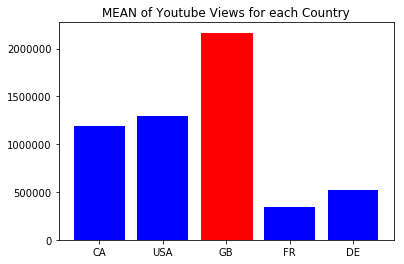

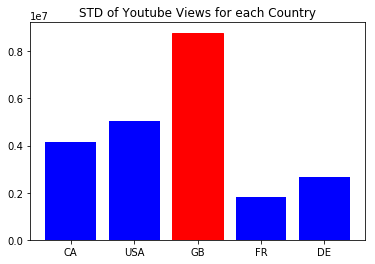

In [6]:
#The columns, datatypes, data, and countries we want for visualizing our datasets
cols = ["views","likes","dislikes","comment_count"]
dtypes = "int64"
country = ["CA", "USA", "GB", "FR","DE"]
all_data = [caVideo_df, usaVideo_df, gbVideo_df, frVideo_df, deVideo_df]

viz_personal.dataframe_stats(desired_feature="views", statistics = ["mean","std"],countries = country, dtype =dtypes,datasetList = all_data)


##### 2.3.1.2 Dislikes

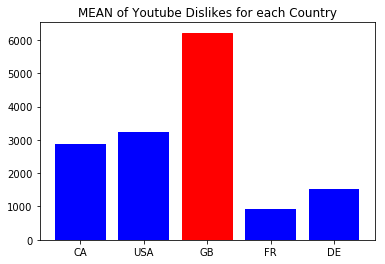

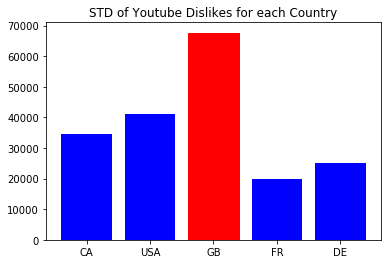

In [7]:
viz_personal.dataframe_stats(desired_feature="dislikes", statistics = ["mean","std"],countries = country, dtype =dtypes,datasetList = all_data)


##### 2.3.1.3 Comment Count

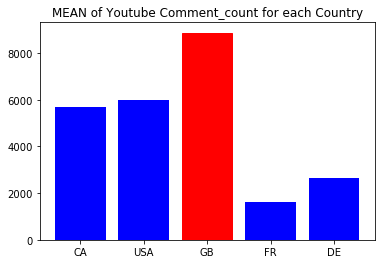

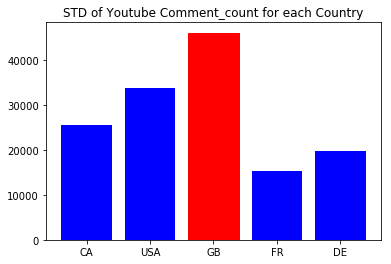

In [8]:
viz_personal.dataframe_stats(desired_feature="comment_count", statistics = ["mean","std"],countries = country, dtype =dtypes,datasetList = all_data)


From our observations, we observe that both the mean and standard deviation of Great Britain (GB) are larger than that of any other country. 

If we look into some of the videos in our upcoming analysis, separate document, we could identify why this situation occurs.

Even if the total data sizes for each dataset are relatively the same, GB had had more Dislikes, Comments, Likes, and other cases. 

Does this mean that:

1. GB has more created content?

2. Youtubers watch more GB content?

3. GB has more viral content?

We'll see... later

#### 2.3.2 Datatypes

Because every dataset is derived from the same source, we can print out the datatypes for every dataset from one of them. I.e. We print out the datatypes for one dataset, instead of for all.

The following are the datatypes for every dataset.

(Note: If you would like validate any discrepancies, you can uncomment the comment section)

In [9]:
print("Data Types of and features for all datasets:\n\n  ",caVideo_df.dtypes)



#Addresses the Note, from the above comment section
#--------------------------------------------------------
#print("Data Types of and features for Canada:\n\n  ",caVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for USA:\n\n  ",usaVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for Great Britain:\n\n ",gbVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for France:\n\n  ",frVideo_df.dtypes)
#print("Descriptive Statistics of rows and features for Germany:\n\n  ",deVideo_df.dtypes)

Data Types of and features for all datasets:

   video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object


In this portion, we notice that we have a couple of unneccasary pieces of information to analyze this data. 

Moreover, can we identify any trivial cases of information that may be affected from:

1. Poor Derivation

2. Extraction

3. Other Potential Modification? 

We find out in the following **Cleaning** portion section. 

## 3.0 Cleaning

### 3.1 Formatting Trend Date Feature

Firstly, we format the "trending_date" feature from having dots as its delimiters, to "slash" delimiters. 

For example, 1.1.17 will now be 1/1/17.

In [10]:
for dataset in all_data:
    for a in range(0,len(caVideo_df["trending_date"])):
        if("." in str(dataset.iloc[a]["trending_date"])):
            x = str(dataset.iloc[a]["trending_date"]).split(".")
            dataset.at[a,"trending_date"] = x[2]+"/"+ x[1]+ "/20"+x[0]
        else:
            continue

### 3.2 Identifying Null Values

In [11]:
video_list_str = ["caVideo_nullCount", "gbVideo_nullCount", 
              "frVideo_nullCount", "deVideo_nullCount", "usaVideo_nullCount"]

In [12]:
allVideos_nullCount = {}
for index, videos in enumerate(all_data):
    temp_dic = {}
    for col in videos:
        #temp_dic = {}
        null_val = videos[col].isnull().values.sum()
        temp_dic[col] = null_val
    allVideos_nullCount[video_list_str[index]] = temp_dic

In [13]:
pprint.pprint(allVideos_nullCount )

{'caVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 309,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
                       'ratings_disabled': 0,
                       'tags': 0,
                       'thumbnail_link': 0,
                       'title': 0,
                       'trending_date': 0,
                       'video_error_or_removed': 0,
                       'video_id': 0,
                       'views': 0},
 'deVideo_nullCount': {'category_id': 0,
                       'channel_title': 0,
                       'comment_count': 0,
                       'comments_disabled': 0,
                       'description': 754,
                       'dislikes': 0,
                       'likes': 0,
                       'publish_time': 0,
        

We identify that the Description feature for every dataset contains a lack of information, or just non-entered information. In regards to Semantic Analysis, having no description is vital. 

However, there are two things to think about for the concern of this information

1. The total amount of non-entered values isn't significant enough to cause a concern for validating them or more. Moreover, the upcoming analysis, seperate from this documentation, doesn't has its concerns centered around Natural Language Processing and Semantic Analysis

2. If we look at the following Channel Users and Titles of the videos for every country, we observe that these videos are from non-influencers such as fan-made creations, commentators, or others.

In [14]:
usaVideo_df[usaVideo_df["description"].isnull() == True][["title","channel_title"]][0:20]

,title,channel_title
42,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
47,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube
175,Sphaera - demonstrating interaction,Jenny Hanell
267,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
312,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube
446,Devin Booker has words with Lakers assistant J...,NBA Highlights · YouTube
523,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach
632,Jaylen Brown delivers emotional press conferen...,MassLive
678,Devin Booker has words with Lakers assistant J...,NBA Highlights · YouTube
750,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach


In [15]:
caVideo_df[caVideo_df["description"].isnull() == True][["title","channel_title"]][0:20]

,title,channel_title
98,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生
115,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER
128,Pres. Trump: Putin's Denials Of Interference I...,The View
165,Outlander S03E09 i'm melting with you'',Ella bell
179,شاهد انبهار الاعلام المصري بتأهل المغرب لكأس ...,Info Press
182,بالفيديو ... سعد الحريري يتلقى معلومة من خلف ا...,tayyar.org
276,Writer: My Kids Can't Be Friends With White Pe...,The View
350,习大大李克强乘风破浪全线出击 中日韩东盟空前合体 特朗普遭重创提前出局？,炮座新观察【各路嘉宾 每日热评】
371,WATCH LIVE: Attorney General Sessions testifie...,PBS NewsHour
437,Il fait la statue et échappe à la police penda...,jean registre


In [16]:
gbVideo_df[gbVideo_df["description"].isnull() == True][["title","channel_title"]][0:100]

,title,channel_title
91,Bone on Labour HQ,Ross Kempsell
118,Arvo Pärt - Tabula Rasa,JSaxofone
187,Brad Bufanda Demo Reel,EinsteinEnt
309,Bone on Labour HQ,Ross Kempsell
336,Arvo Pärt - Tabula Rasa,JSaxofone
394,Brad Bufanda Demo Reel,EinsteinEnt
521,Bone on Labour HQ,Ross Kempsell
546,Arvo Pärt - Tabula Rasa,JSaxofone
760,Bone on Labour HQ,Ross Kempsell
787,Arvo Pärt - Tabula Rasa,JSaxofone


Therefore, we sadly delete the the rows that contain a lack of information in the description feature. 

(**Note:** I do not recommend such conclusions in analyses. Deleting information creates misinformation, potential biases, and more. However, we can choose to delete this cases for the sake of lack of importance or dependency of this project. 

I.e. This is a side project, and it's no concern.)

Addtional note: Did you see those Donald Trump Channel users? Interesting amount of imposter channels based of him...weird.

### 3.3 New Feature

For our analysis, may want to want to add a new feature "Country", for all datasets concatentated. 

This categorical variable allows us to obersve a new dimension in visualizations.

In [17]:
caVideo_df["Country"] = ["CA" for  x in range(0,len(caVideo_df) )]
usaVideo_df["Country"] = ["USA" for x in range(0,len(usaVideo_df) )]
gbVideo_df["Country"] = ["GB" for x in range(0,len(gbVideo_df) )]
frVideo_df["Country"] = ["FR" for x in range(0,len(frVideo_df) )]
deVideo_df["Country"] = ["DE" for x in range(0,len(deVideo_df) )]

### 3.4 Drop Information

Here, we drop any null values that exist in each dataset. As seen from before, the following are the number of missing "Description values. 

In [18]:
for key, vals in allVideos_nullCount.items():
    print(key, "Total Null Value Description Count: ",vals["description"])

caVideo_nullCount Total Null Value Description Count:  309
frVideo_nullCount Total Null Value Description Count:  134
deVideo_nullCount Total Null Value Description Count:  754
usaVideo_nullCount Total Null Value Description Count:  446
gbVideo_nullCount Total Null Value Description Count:  161


Because there is no significant amount of null values, we therefore "drop" them, as mentioned earlier in this inspection.

In [19]:
#Delete Rows containing nulls in Description column for all datasets
caVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
usaVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
gbVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
deVideo_df.dropna(axis = 0, subset=["description"], inplace = True)
frVideo_df.dropna(axis = 0, subset=["description"], inplace = True)

### 3.5 Combining Datasets

Now, we combine all datasets to get an estimated **50,000 rows by 17 columns** dataset.

In [20]:
main_df = pd.concat(all_data)

### 3.6 Unique Rows

Deleting duplicate rows, if they exist.

In [21]:
main_df.drop_duplicates(inplace = True)


In [22]:
'''
bad idea
for a in range(len(main_df["trending_date"])):
    x = str(main_df.iloc[a]["trending_date"]).split(".")

    main_df.iloc[a]["trending_date"] = x[2]+"/"+ x[1]+ "/20"+x[0]
main_df["trending_date"]
'''

'''
for a in range(0,len(main_df["trending_date"])):
    if("." in str(main_df.iloc[a]["trending_date"])):
        x = str(main_df.iloc[a]["trending_date"]).split(".")
        print(x)
        main_df.at[a,"trending_date"] = x[2]+"/"+ x[1]+ "/20"+x[0]
    else:
        continue
'''

'\nfor a in range(0,len(main_df["trending_date"])):\n    if("." in str(main_df.iloc[a]["trending_date"])):\n        x = str(main_df.iloc[a]["trending_date"]).split(".")\n        print(x)\n        main_df.at[a,"trending_date"] = x[2]+"/"+ x[1]+ "/20"+x[0]\n    else:\n        continue\n'

### 3.8 Category Name

One last item. We would like to provide names to the "category_id" feature to get a sense of what categories these videos lie in. 

Grabbing some information from [this Gist on Youtube Category names](https://gist.github.com/dgp/1b24bf2961521bd75d6c), we identify the category names for the ""category_id" feature.

In [23]:
#Bring in Category Ids and Names
category_ids = pd.read_csv("../Resources/YoutubeResources/Youtube-IDs.csv",usecols=["category_id","category_name"] )

#Join datasets 
main_df = main_df.merge(category_ids, left_on = "category_id",right_on="category_id",how = "inner")

## 4.0 Export

Lastly, we export the, already clean, but super clean, dataset with the following features:

1. video_id

2. trending_date

3. title 

4. channel_title

5. category_id

6. category_name

7. publish_time

8. views

9. likes 

10. dislikes

11. comment_count

12. comments_disabled

13. ratings_disabled

14. video_error_or_removed

15. description

16. Country



In [24]:
youtubeVid_exportDF = main_df[["video_id","trending_date","title","channel_title","category_id",
                               "category_name","publish_time","views","likes","dislikes","comment_count","comments_disabled",
                               "ratings_disabled","video_error_or_removed","description","Country"]]

In [25]:
youtubeVid_exportDF.to_csv(path_or_buf="../Data/youtubeVid_main.csv", sep=',')